In [1]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D
import tensorflow as tf


In [2]:
image_path = "/content/cat_image.jpg"

img = cv2.imread(image_path)
img = cv2.resize(img, (256, 256))

gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

input_tensor = gray.reshape(1, 256, 256, 1).astype(np.float32) / 255.0

In [3]:
vertical_kernel = np.array([
    [-1, 0, 1],
    [-2, 0, 2],
    [-1, 0, 1]
], dtype=np.float32)

kernel_tensor = vertical_kernel.reshape((3, 3, 1, 1))
input_shape = (256, 256, 1)


In [4]:
model_without_padding = Sequential([
    Conv2D(1, 3, use_bias=False, input_shape=input_shape)
])

model_with_padding = Sequential([
    Conv2D(1, 3, padding='same', use_bias=False, input_shape=input_shape)
])

model_pooled = Sequential([
    Conv2D(1, 3, padding='same', use_bias=False, input_shape=input_shape),
    MaxPooling2D(2)
])


/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [5]:
model_without_padding.layers[0].set_weights([kernel_tensor])
model_with_padding.layers[0].set_weights([kernel_tensor])
model_pooled.layers[0].set_weights([kernel_tensor])

In [6]:
print("Running predictions...")

output_valid = model_without_padding.predict(input_tensor)
output_same = model_with_padding.predict(input_tensor)
output_pooled = model_pooled.predict(input_tensor)

print("Predictions complete.")


Running predictions...
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 164ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step
Predictions complete.


In [7]:
feature_map_valid = output_valid[0,:,:,0]
feature_map_same = output_same[0,:,:,0]
feature_map_pooled = output_pooled[0,:,:,0]


In [8]:
print("\n--- Output Size Comparison ---")
print(f"1. Original Input:\t\t{gray.shape}")
print(f"2. Conv (no padding) Map:\t{feature_map_valid.shape}")
print(f"3. Conv (with padding) Map:\t{feature_map_same.shape}")
print(f"4. Conv + Pool Map:\t\t{feature_map_pooled.shape}")



--- Output Size Comparison ---
1. Original Input:		(256, 256)
2. Conv (no padding) Map:	(254, 254)
3. Conv (with padding) Map:	(256, 256)
4. Conv + Pool Map:		(128, 128)


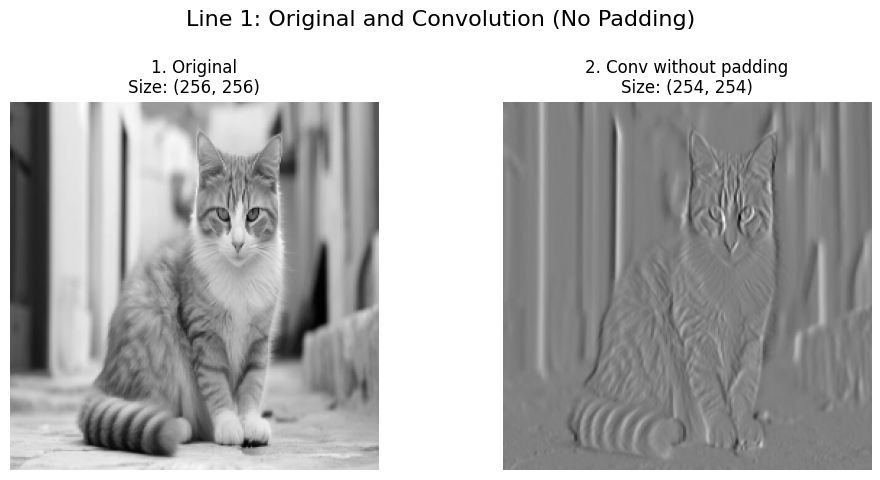

In [9]:
plt.figure(figsize=(10, 5))
plt.suptitle("Line 1: Original and Convolution (No Padding)", fontsize=16)

plt.subplot(1, 2, 1)
plt.title(f"1. Original\nSize: {gray.shape}")
plt.imshow(gray, cmap='gray')
plt.axis("off")

plt.subplot(1, 2, 2)
plt.title(f"2. Conv without padding\nSize: {feature_map_valid.shape}")
plt.imshow(feature_map_valid, cmap='gray')
plt.axis("off")

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()


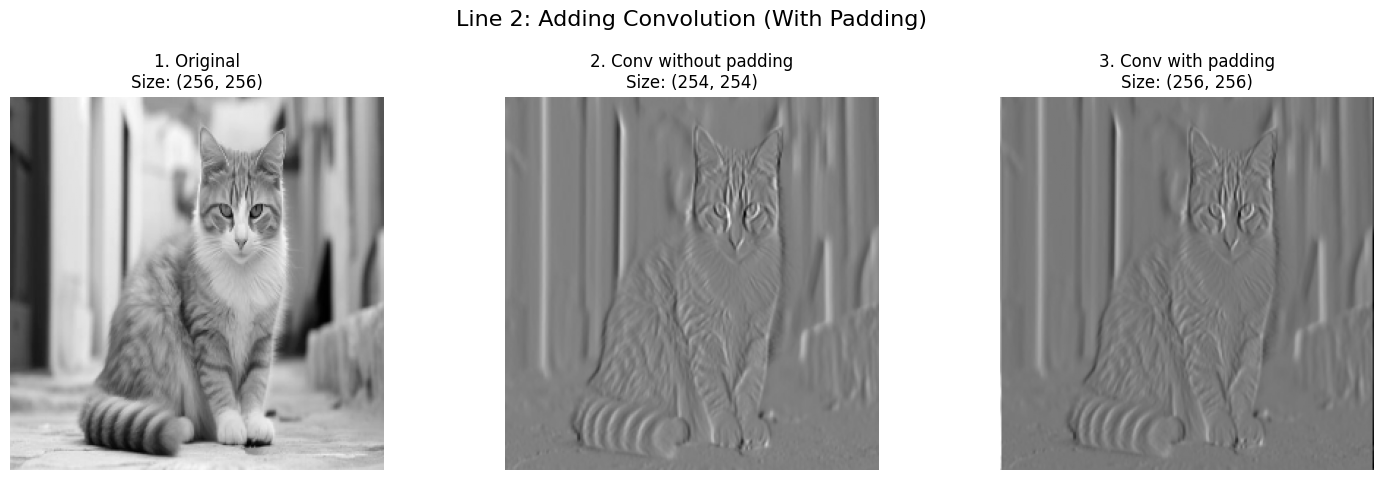

In [10]:
plt.figure(figsize=(15, 5))
plt.suptitle("Line 2: Adding Convolution (With Padding)", fontsize=16)

plt.subplot(1, 3, 1)
plt.title(f"1. Original\nSize: {gray.shape}")
plt.imshow(gray, cmap='gray')
plt.axis("off")

plt.subplot(1, 3, 2)
plt.title(f"2. Conv without padding\nSize: {feature_map_valid.shape}")
plt.imshow(feature_map_valid, cmap='gray')
plt.axis("off")

plt.subplot(1, 3, 3)
plt.title(f"3. Conv with padding\nSize: {feature_map_same.shape}")
plt.imshow(feature_map_same, cmap='gray')
plt.axis("off")

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()


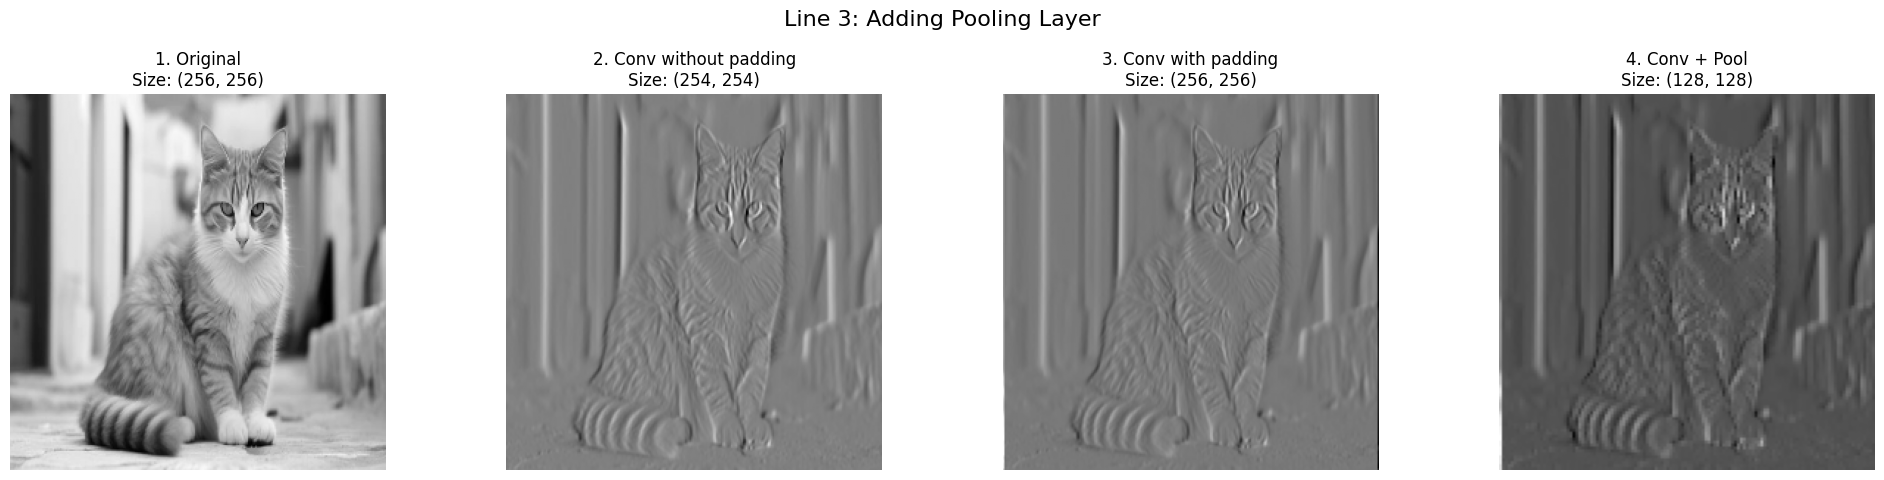

In [11]:
plt.figure(figsize=(20, 5))
plt.suptitle("Line 3: Adding Pooling Layer", fontsize=16)

plt.subplot(1, 4, 1)
plt.title(f"1. Original\nSize: {gray.shape}")
plt.imshow(gray, cmap='gray')
plt.axis("off")

plt.subplot(1, 4, 2)
plt.title(f"2. Conv without padding\nSize: {feature_map_valid.shape}")
plt.imshow(feature_map_valid, cmap='gray')
plt.axis("off")

plt.subplot(1, 4, 3)
plt.title(f"3. Conv with padding\nSize: {feature_map_same.shape}")
plt.imshow(feature_map_same, cmap='gray')
plt.axis("off")

plt.subplot(1, 4, 4)
plt.title(f"4. Conv + Pool\nSize: {feature_map_pooled.shape}")
plt.imshow(feature_map_pooled, cmap='gray')
plt.axis("off")

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()
